In [52]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

In [53]:
#Ecuación diferencial

def d_v(x):
    return -x

In [54]:
#Condiciones iniciales y finales

x0 = 1
v0 = 0
t0 = 0 
tf = 10

N = 200 
t_Yoshi = np.linspace(t0, tf, N)

In [55]:
#Yoshi

def Yoshi(t0, tf, x0, v0, t_Yoshi):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    X = np.zeros(len(t))
    V = np.zeros(len(t))
    
    X[0] = x0
    V[0] = v0
    
    W0 = -1.7024
    W1 = 1.3512
    
    C = [W1/2, (W0+W1)/2, (W0+W1)/2, W1/2 ]
    D = [W1, W0, W1]
    
    for i in range(1,len(t)):
        
        x1 = X[i-1] + C[0]*V[i-1]*(t[i]-t[i-1])
        v1 = V[i-1] + D[0]*d_v(x1)*(t[i]-t[i-1])
        
        x2 = x1 + C[1]*v1*(t[i]-t[i-1])
        v2 = v1 + D[1]*d_v(x2)*(t[i]-t[i-1])
        
        x3 = x2 + C[2]*v2*(t[i]-t[i-1])
        v3 = v2 + D[2]*d_v(x3)*(t[i]-t[i-1])

        x4 = x3 + C[3]*v3*(t[i]-t[i-1])
        v4 = v3
        
        X[i] = x4
        V[i] = v4
    
    return X, V

In [56]:
X_Yoshi, V_Yoshi = Yoshi(t0, tf, x0, v0, t_Yoshi)

In [57]:
# Calculando las energias

Epe_Yoshi = []
Ec_Yoshi = []
Em_Yoshi = []

for i in X_Yoshi:
    Epe_Yoshi.append((1/2)*i**2)
    
for i in V_Yoshi:
    Ec_Yoshi.append((1/2)*i**2)    

for i in range(len(Ec_Yoshi)):
    Em_Yoshi.append(Epe_Yoshi[i]+Ec_Yoshi[i])

In [58]:
N = 201
t_LeapFrog = np.linspace(t0, tf, N)

r0 = np.array([1.0,0])

In [59]:
#LeapFrog

def LeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    x = np.zeros(N)
    v = np.zeros(N) 
    
    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*d_v(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*d_v(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    
    return X,V

In [62]:
X_LeapFrog, V_LeapFrog = LeapFrog(r0, t_LeapFrog)

In [65]:
# Calculando las energias

Epe_LeapFrog = []
Ec_LeapFrog = []
Em_LeapFrog = []

for i in X_LeapFrog:
    Epe_LeapFrog.append((1/2)*i**2)
    
for i in V_LeapFrog:
    Ec_LeapFrog.append((1/2)*i**2)    

for i in range(len(Ec_LeapFrog)):
    Em_LeapFrog.append(Epe_LeapFrog[i]+Ec_LeapFrog[i])

<IPython.core.display.Javascript object>


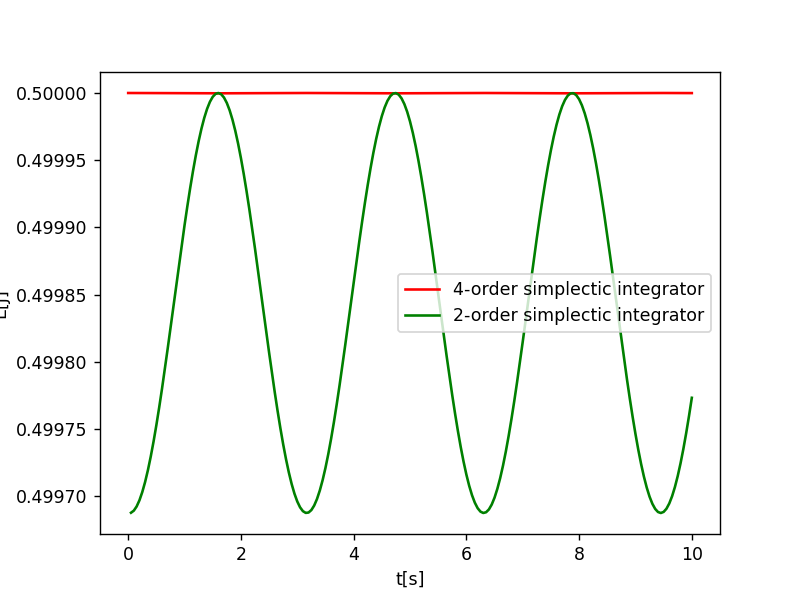

In [66]:
plt.figure()
plt.xlabel("t[s]")
plt.ylabel("E[J]")
plt.plot(t, Em_Yoshi, label = '4-order simplectic integrator', color = "red")
plt.plot(t_LeapFrog[1:], Em_LeapFrog, label = '2-order simplectic integrator', color = "green")
plt.legend()
plt.show()